In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# First step will be to import the feature data and the labels
data_path = "C:/Users/biapt/Documents/full_wei_data.csv";
data = pd.read_csv(data_path)
# here what everything means:
'''
frequencies = {"alpha","beta","delta","theta","gamma"};
epochs = {'ec1','emf5','ec1','if5','emf5','eml5','ec3','ec8'};
graph = {"aec","pli"}
The ids we see are mapping to these
'''
data

,p_id,frequency,epoch,graph,window,mean_1,mean_2,mean_3,mean_4,mean_5,...,clust_coeff_ 77,clust_coeff_ 78,clust_coeff_ 79,clust_coeff_ 80,clust_coeff_ 81,clust_coeff_ 82,norm_avg_clust_coeff,norm_g_eff,community,small_worldness
0,1,1,1,0,1,0.214410,0.206480,0.186960,0.095920,0.185300,...,0.111200,0.127020,0.102430,0.137680,0.151390,0.101670,0.99897,0.97336,0.147250,0.95888
1,1,1,1,1,1,0.135180,0.133150,0.066425,0.142670,0.187410,...,0.106720,0.128150,0.104750,0.105940,0.094395,0.109470,0.99442,0.97609,0.117070,0.95943
2,1,1,1,0,2,0.173520,0.176050,0.207510,0.196660,0.100010,...,0.193260,0.181300,0.098848,0.171360,0.131640,0.119280,0.99763,0.98745,0.083997,0.97921
3,1,1,1,1,2,0.135480,0.110920,0.099013,0.136760,0.166900,...,0.091389,0.103490,0.113290,0.102150,0.087017,0.120590,0.99338,0.98542,0.119380,0.96962
4,1,1,1,0,3,0.090807,0.194400,0.160160,0.122470,0.049862,...,0.115170,0.109680,0.092119,0.157790,0.145170,0.150840,0.99841,0.98561,0.147540,0.97606
5,1,1,1,1,3,0.089552,0.056574,0.085036,0.109230,0.130940,...,0.101490,0.087030,0.086551,0.071742,0.069271,0.094503,0.99216,0.98582,0.110580,0.96761
6,1,1,1,0,4,0.092985,0.167780,0.171060,0.174230,0.075009,...,0.132310,0.112610,0.099264,0.141140,0.116810,0.122770,0.99815,0.98590,0.142180,0.97396
7,1,1,1,1,4,0.056143,0.058897,0.039806,0.064573,0.101440,...,0.108020,0.113390,0.078162,0.068628,0.074071,0.096014,0.99498,0.98338,0.121510,0.97278
8,1,1,1,0,5,0.085757,0.135000,0.094392,0.174200,0.048321,...,0.097576,0.108650,0.116480,0.127690,0.107610,0.087126,0.99925,0.99085,0.142330,0.98124
9,1,1,1,1,5,0.104530,0.089392,0.081475,0.106140,0.129180,...,0.085813,0.122850,0.074097,0.087794,0.088316,0.095469,0.99460,0.98725,0.119500,0.97627


In [3]:
# We will keep the same structure than we did in the AEC vs wPLI project for the machine learning

# Machine Learning 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
# Sklearn utils
from sklearn.base import clone
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# aec = 0 pli = 1
analysis_type = 0
epochs_to_keep = [1,5]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]

clfs = [LinearDiscriminantAnalysis(solver='svd'), SVC(kernel='linear', C=0.1),SVC(kernel='linear', C=0.5), SVC(kernel='linear', C=1.0), SVC(kernel='rbf', C=0.1), SVC(kernel='rbf',C=1.0),RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)]
selected_clf = clfs[2]

def classify(dataset, original_clf):
    clf = clone(original_clf)
    # Initialize the Result data structures
    cms = []
    accuracies = []
    reports = []
    # TODO: Check in the MATLAB file how to not have to do this + 1
    for test_id in range(1,10):
        print("Participant: " + str(test_id) + " in hold-out set:")
        
        # Split the data in a leave one subject out manner
        
        # Get the training and test dataset
        training_dataset = dataset[dataset['p_id'] != test_id]
        test_dataset = dataset[dataset['p_id'] == test_id]
        
        # Get the X and Y 
        X_train = training_dataset.iloc[:,5:]
        y_train = training_dataset['epoch']
        
        # Training the min max normalizer
        min_max_scaler = MinMaxScaler()
        min_max_scaler.fit(X_train)
        X_train = min_max_scaler.transform(X_train)
        
        X_test = test_dataset.iloc[:,5:]
        y_test = test_dataset['epoch']
        
        # Normalize the test set using a training scaler
        X_test = min_max_scaler.transform(X_test)
        
        # Fitting our model
        clf.fit(X_train, y_train)

        # predicting
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        #print("Generalization accuracy: " + str(accuracy))
        #print(cm)
        #print(report)
        
        # Saving the results
        cms.append(cm)
        accuracies.append(accuracy)
        reports.append(report)
        
    return (cms,accuracies,reports)

(cms, accuracies, report) = classify(subset_data, selected_clf)
print("Mean accuracy is: " + str(np.mean(accuracies)))

Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Mean accuracy is: 0.5528204182108506


In [4]:
# Iterating through all the epoch and aggregating all the averages
selected_clf = clfs[6] # goes from 0 to 7
total = 0
for a_i in range(0,2):
    for e_i in range(2,6):
        analysis_type = a_i # 0 = aec, 1 = wPLI
        epochs_to_keep = [1,e_i]
        analysis = data['graph'] == analysis_type
        baseline = data['epoch'] == epochs_to_keep[0]
        other = data['epoch'] == epochs_to_keep[1]
        subset_data = data[analysis & (baseline | other)]
        (cms, accuracies, report) = classify(subset_data, selected_clf)
        total = total + np.mean(accuracies)
print("Average performance for classifier = " + str(total/8))

Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Particip

## Average Classification Result
- LDA : 0.6650799789491493
- Linear SVM C=0.1 : 0.6850622618599771
- Linear SVM C=0.5 : 0.6852205308138111
- Linear SVM C=1.0 : 0.6842265725506583
- RBF SVM C=0.1 : 0.5581517916164056
- RBF SVM C=1.0 : 0.6448795803208284
- RF n=100, max=2 : 0.6528903224361835

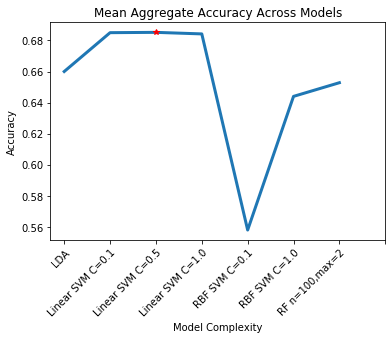

In [5]:
# Generating the figure 
# Visualization
import matplotlib.pyplot as plt
#Helper function
def make_plot(data,title):
    #static data
    models = ["LDA","Linear SVM C=0.1", "Linear SVM C=0.5", "Linear SVM C=1.0", "RBF SVM C=0.1", "RBF SVM C=1.0", "RF n=100,max=2"]
    x = [0,1,2,3,4,5,6]

    # Figure 
    fig = plt.figure()
    ax = plt.axes()

    ax.plot(x, data, linewidth=3)
    ax.plot(2,data[2],'r*')

    ax.set(xticks=np.arange(len(data) + 1),
        # ... and label them with the respective list entries
        xticklabels=models,
        title=title,
        ylabel='Accuracy',
        xlabel='Model Complexity')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

    plt.show()
    
aggregate = [0.66, 0.6850, 0.6852, 0.6842, 0.558, 0.644 ,0.6528]
make_plot(aggregate, "Mean Aggregate Accuracy Across Models")

In [ ]:
from math import floor
import pickle
import copy
from sklearn.utils import resample

# Now we need to add in the bootstrap confidence interval and the permutation testing
# Iterate num_bootstrap times and create a classifier with the resampled data
# Then create confidence interval for the and the accuracy, f_1 score
# The p value used here is 0.05
# This means that the lower bound = math.floor((num_bootstrap/100)*2.5)
#                     upper bound = math.floor((num_bootstrap/100)*97.5)
def generate_confidence_interval(original_dataset, clf, num_bootstrap):
    lb_index = floor((num_bootstrap/100)*(2.5))
    ub_index = floor((num_bootstrap/100)*(97.5))

    accuracies = []

    conf_interval_accuracy = (-1,-1)

    # Here we overwrite the dataset X, y and I and run the classify function
    # for each bootstrap samples
    for b_id in range(num_bootstrap):
        print("Bootstrap sample #" + str(b_id))
        # Copy the original dataset before manipulating it
        dataset = copy.deepcopy(original_dataset)

        # Get the sampled with replacement dataset
        resampled_data = resample(dataset)

        # Classify and get the results
        (cms, acc, report) = classify(resampled_data, clf)

        accuracies.append(np.mean(acc))
                          
    # Sort the results
    accuracies.sort()

    # Set the confidence interval at the right index
    conf_interval_accuracy = (accuracies[lb_index],accuracies[ub_index])

    return (accuracies,conf_interval_accuracy)

# Bootstrap experiment setup
filename = "aec_unconscious"
selected_clf = clfs[2] # 2 was the best
analysis_type = 0 # 0 = aec, 1 = wPLI
epochs_to_keep = [1,3]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]
                          
# Generate confidence interval for the classifier
num_bootstrap = 10
(accuracies,conf_interval_accuracy) = generate_confidence_interval(subset_data, selected_clf, num_bootstrap)
print("Confidence interval for Accuracy: " + str(conf_interval_accuracy))
pickle_out = open(filename,"wb")
pickle.dump(accuracies, pickle_out)
pickle_out.close()

Bootstrap sample #0
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Bootstrap sample #1
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Bootstrap sample #2
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Bootstrap sample #3
Participant: 1 in hold-out set:
Participant: 2 in hold-o